In [ ]:
# good

In [99]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import pearsonr


# Read and load the obesity dataset

obesity_df = pd.read_csv("../Project/ObesityDataSet.csv")
obesity_df.head()

,Gender,Age,Height(m),Weight(kg),family_history_with_overweight,FAVC(Frequent Consumption of High Caloric Food),FCVC(Frequency of consumption of Vegetables),NCP( Number of Main Meals),CAEC( Consumption of Food Between Meals),SMOKE,CH2O(Consumption of Water),SCC(Caloric Consumption Monitoring),FAF( Physical Activity Frequency),TUE(Time Using Technology Devices),CALC( Consumption of Alcohol),MTRANS(Transportation Use),Nobeyesdad(Classification of Weight)
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### DATA CLEANING AND EXPLORATION

In [100]:
# Display basic information about the obesity dataset
#finding missing values
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Gender                                            2111 non-null   object 
 1   Age                                               2111 non-null   float64
 2   Height(m)                                         2111 non-null   float64
 3   Weight(kg)                                        2111 non-null   float64
 4   family_history_with_overweight                    2111 non-null   object 
 5   FAVC(Frequent Consumption of  High Caloric Food)  2111 non-null   object 
 6   FCVC(Frequency of consumption of Vegetables)      2111 non-null   float64
 7   NCP( Number of Main Meals)                        2111 non-null   float64
 8   CAEC( Consumption of Food Between Meals)          2111 non-null   object 
 9   SMOKE              

In [101]:
# Generate descriptive statistics
obesity_df.describe().round(2)


,Age,Height(m),Weight(kg),FCVC(Frequency of consumption of Vegetables),NCP( Number of Main Meals),CH2O(Consumption of Water),FAF( Physical Activity Frequency),TUE(Time Using Technology Devices)
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


In [102]:
#determining categorical data
categorical = obesity_df.dtypes[obesity_df.dtypes == "object"].index
print(categorical)

obesity_df[categorical].describe()


Index(['Gender', 'family_history_with_overweight',
       'FAVC(Frequent Consumption of  High Caloric Food)',
       'CAEC( Consumption of Food Between Meals)', 'SMOKE',
       'SCC(Caloric  Consumption Monitoring)', 'CALC( Consumption of Alcohol)',
       'MTRANS(Transportation Use)', 'Nobeyesdad(Classification of Weight)'],
      dtype='object')


,Gender,family_history_with_overweight,FAVC(Frequent Consumption of High Caloric Food),CAEC( Consumption of Food Between Meals),SMOKE,SCC(Caloric Consumption Monitoring),CALC( Consumption of Alcohol),MTRANS(Transportation Use),Nobeyesdad(Classification of Weight)
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [103]:
#renaming columns for easy use
obesity_df= obesity_df.rename(columns={"family_history_with_overweight": "Fhx of Overweight",
                                      "FAVC(Frequent Consumption of  High Caloric Food)":"Freq High Calorie Cons",
                                      "CAEC( Consumption of Food Between Meals)":"Eating inbetween meals",
                                      "SCC(Caloric  Consumption Monitoring)":"Calorie Consumption Monitoring",
                                      "CALC( Consumption of Alcohol)":"Alcohol consumption",
                                      "MTRANS(Transportation Use)":"Transportation used",
                                      "Nobeyesdad(Classification of Weight)":"Weight group",
                                      "FCVC(Frequency of consumption of Vegetables)":"Freq vegetable cons",
                                      "NCP( Number of Main Meals)":"Number of Main Meals",
                                      "SMOKE":"Hx of smoking",
                                      "CH2O(Consumption of Water)":"Water consumption",
                                     "FAF( Physical Activity Frequency)":"Freq of Physical Activity",
                                      "TUE(Time Using Technology Devices)":"Time spent on Tech devices"})
obesity_df.head()

,Gender,Age,Height(m),Weight(kg),Fhx of Overweight,Freq High Calorie Cons,Freq vegetable cons,Number of Main Meals,Eating inbetween meals,Hx of smoking,Water consumption,Calorie Consumption Monitoring,Freq of Physical Activity,Time spent on Tech devices,Alcohol consumption,Transportation used,Weight group
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [104]:
#calclating BMI for each datapoint and creating a new column for that information
BMI= obesity_df["Weight(kg)"]/(obesity_df["Height(m)"]**2)
obesity_df["BMI"] = round(BMI,1)  
obesity_df.head()

,Gender,Age,Height(m),Weight(kg),Fhx of Overweight,Freq High Calorie Cons,Freq vegetable cons,Number of Main Meals,Eating inbetween meals,Hx of smoking,Water consumption,Calorie Consumption Monitoring,Freq of Physical Activity,Time spent on Tech devices,Alcohol consumption,Transportation used,Weight group,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.4
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.2
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.8
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.9
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.3


In [105]:
#Classifying weight
for i in obesity_df["BMI"]:
    if i < 18.5:
        obesity_df.loc[obesity_df["BMI"]== i,"Weight classification"] = "Underweight"
    elif i <= 24.9:
        obesity_df.loc[obesity_df["BMI"]== i,"Weight classification"] = "Normal"
    elif i <= 29.9:
        obesity_df.loc[obesity_df["BMI"]== i,"Weight classification"] = "Overweight"
    else:
        obesity_df.loc[obesity_df["BMI"]== i,"Weight classification"] = "Obese"

obesity_df



,Gender,Age,Height(m),Weight(kg),Fhx of Overweight,Freq High Calorie Cons,Freq vegetable cons,Number of Main Meals,Eating inbetween meals,Hx of smoking,Water consumption,Calorie Consumption Monitoring,Freq of Physical Activity,Time spent on Tech devices,Alcohol consumption,Transportation used,Weight group,BMI,Weight classification
0,Female,21.00,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,Normal_Weight,24.4,Normal
1,Female,21.00,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight,24.2,Normal
2,Male,23.00,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.00,Frequently,Public_Transportation,Normal_Weight,23.8,Normal
3,Male,27.00,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.00,Frequently,Walking,Overweight_Level_I,26.9,Overweight
4,Male,22.00,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II,28.3,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.98,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.91,Sometimes,Public_Transportation,Obesity_Type_III,44.9,Obese
2107,Female,21.98,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.60,Sometimes,Public_Transportation,Obesity_Type_III,43.7,Obese
2108,Female,22.52,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.65,Sometimes,Public_Transportation,Obesity_Type_III,43.7,Obese
2109,Female,24.36,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.59,Sometimes,Public_Transportation,Obesity_Type_III,44.0,Obese


In [106]:
filepath = "..\output"
obesity_df.to_csv(filepath, index_label="ID")

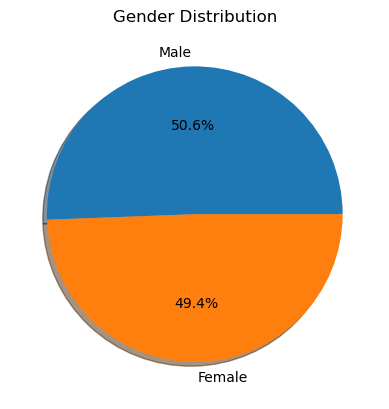

In [107]:
labels=["Male","Female"]
plt.pie(obesity_df["Gender"].value_counts(), autopct = "%1.1f%%", labels=labels, shadow = True)
plt.title("Gender Distribution")
plt.show()

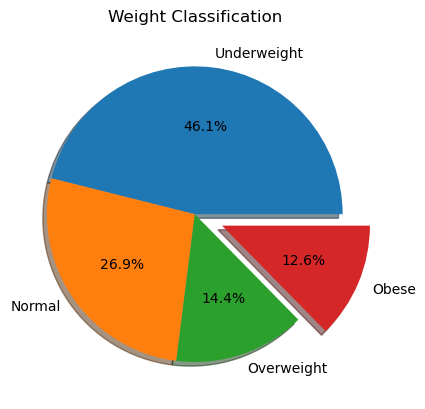

In [108]:
labels=["Underweight","Normal","Overweight","Obese"]
explode = [0,0,0,0.2]
plt.pie(obesity_df["Weight classification"].value_counts(), autopct = "%1.1f%%",shadow = True, labels=labels, explode = explode)
plt.title("Weight Classification")
plt.show()

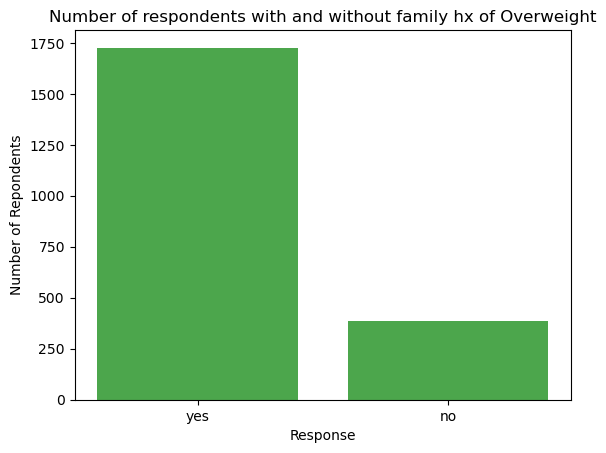

In [109]:
# assessing the extent of family hx of overweight, since family history is the only non modifiable factor being analysed.
x= np.arange(2)
xticks= ("yes", "no")
plt.bar(x,obesity_df["Fhx of Overweight"].value_counts(), color = "g", alpha = 0.7)
plt.xticks(x, xticks)
plt.xlabel("Response")
plt.ylabel("Number of Repondents")
plt.title("Number of respondents with and without family hx of Overweight")
plt.show()

### ANALYSIS

In [110]:
# is there a linear relationship between weight and height

In [111]:
#of those with family history of overweight, what are their weight classifications?

# studying  Obese patients

In [112]:
print(obesity_df.count())

Gender                            2111
Age                               2111
Height(m)                         2111
Weight(kg)                        2111
Fhx of Overweight                 2111
Freq High Calorie Cons            2111
Freq vegetable cons               2111
Number of Main Meals              2111
Eating inbetween meals            2111
Hx of smoking                     2111
Water consumption                 2111
Calorie Consumption Monitoring    2111
Freq of Physical Activity         2111
Time spent on Tech devices        2111
Alcohol consumption               2111
Transportation used               2111
Weight group                      2111
BMI                               2111
Weight classification             2111
dtype: int64


In [113]:
#select data for ony overweight and obese candidates
obese_candidates_df = obesity_df.loc[obesity_df["Weight classification"] == "Obese"]
obese_candidates_df

,Gender,Age,Height(m),Weight(kg),Fhx of Overweight,Freq High Calorie Cons,Freq vegetable cons,Number of Main Meals,Eating inbetween meals,Hx of smoking,Water consumption,Calorie Consumption Monitoring,Freq of Physical Activity,Time spent on Tech devices,Alcohol consumption,Transportation used,Weight group,BMI,Weight classification
10,Male,26.00,1.85,105.00,yes,yes,3.0,3.0,Frequently,no,3.00,no,2.00,2.00,Sometimes,Public_Transportation,Obesity_Type_I,30.7,Obese
13,Male,41.00,1.80,99.00,no,yes,2.0,3.0,Sometimes,no,2.00,no,2.00,1.00,Frequently,Automobile,Obesity_Type_I,30.6,Obese
17,Female,29.00,1.53,78.00,no,yes,2.0,1.0,Sometimes,no,2.00,no,0.00,0.00,no,Automobile,Obesity_Type_I,33.3,Obese
21,Female,52.00,1.69,87.00,yes,yes,3.0,1.0,Sometimes,yes,2.00,no,0.00,0.00,no,Automobile,Obesity_Type_I,30.5,Obese
23,Female,22.00,1.60,82.00,yes,yes,1.0,1.0,Sometimes,no,2.00,no,0.00,2.00,Sometimes,Public_Transportation,Obesity_Type_I,32.0,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.98,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.91,Sometimes,Public_Transportation,Obesity_Type_III,44.9,Obese
2107,Female,21.98,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.60,Sometimes,Public_Transportation,Obesity_Type_III,43.7,Obese
2108,Female,22.52,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.65,Sometimes,Public_Transportation,Obesity_Type_III,43.7,Obese
2109,Female,24.36,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.59,Sometimes,Public_Transportation,Obesity_Type_III,44.0,Obese


## Does deitary habit have any influence on obesity risk?

In [114]:
# how many of them have good deitary habits(ie eating vegetables,water consuption, calorie counting?)

In [115]:
# how many of them have poor deitary habits(ie eating between meals, high calorie consumption,)

## Do smoking and alcohol consumption have any influence on obesity risk?

In [152]:
# Count the occurrences of 'Hx of smoking' and 'Alcohol consumption' for each 'Weight classification'
smoke_counts = obesity_df.groupby("Weight classification")["Hx of smoking"].value_counts().unstack(fill_value=0)
alcohol_counts = drinking_df.groupby(["Weight classification", "Alcohol consumption"]).size().unstack(fill_value=0)

# Combine the smoke and alcohol counts into a single DataFrame
lifestyle_df = pd.concat([smoke_counts, alcohol_counts], axis=1)

# Print or display the new DataFrame
print("Frequency of smoking and alcohol consumption for each weight class (excluding non-drinkers):")
print(lifestyle_df)

Frequency of smoking and alcohol consumption for each weight class (excluding non-drinkers):
                        no  yes  Always  Frequently  Sometimes
Weight classification                                         
Normal                 290   13       1          18        173
Obese                  951   22       0          16        720
Overweight             560    8       0          35        356
Underweight            266    1       0           1        152


In [117]:
# how many smoke and drink alcohol(lifestyle) for each weight class

# Count the occurrences of smoking for each weight class
smoke_counts_df = obese_candidates_df.groupby("Weight classification")["Hx of smoking"].value_counts().unstack(fill_value=0)

# Print or display the DataFrame
print("Occurrences of smoking for each weight class:")
print(smoke_counts_df)


Occurrences of smoking for each weight class:
Hx of smoking           no  yes
Weight classification          
Obese                  951   22


In [119]:
# Filter out non-smokers
smoking_df = obesity_df[obesity_df["Hx of smoking"] != "no"]

# Count the occurrences of smoking for each weight class
smoke_counts_df = smoking_df.groupby("Weight classification")["Hx of smoking"].value_counts().unstack(fill_value=0)

# Print or display the DataFrame
print("Occurrences of smoking for each weight class:")
print(smoke_counts_df)





Occurrences of smoking for each weight class:
Hx of smoking          yes
Weight classification     
Normal                  13
Obese                   22
Overweight               8
Underweight              1


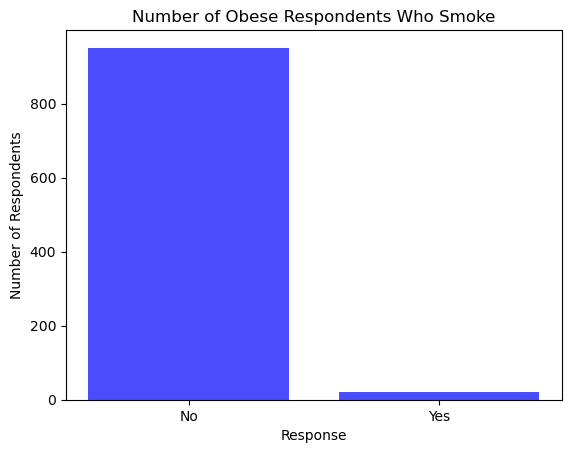

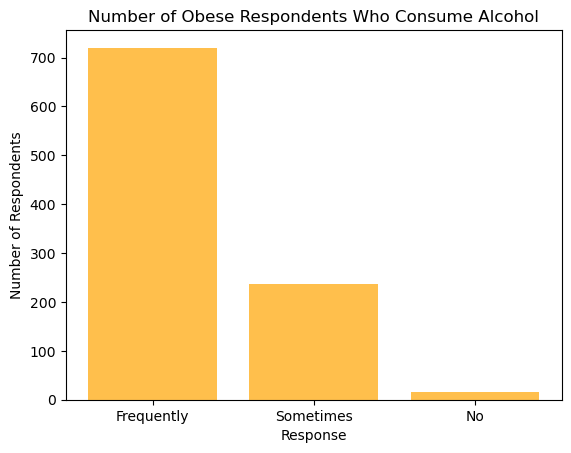

Frequency of smoking and alcohol consumption for each weight class
                        no  yes  Frequently  Sometimes   no
Weight classification                                      
Obese                  951   22          16        720  237


In [191]:
# Combine the smoke and alcohol counts into a single DataFrame
lifestyle_df = pd.concat([smoke_counts_df, alcohol_counts_df], axis=1)

# Plot the bar graph for smoking

x = np.arange(2)
xticks = ("No", "Yes")
plt.bar(x, obese_candidates_df["Hx of smoking"].value_counts(), color="blue", alpha=0.7)
plt.xticks(x, xticks)
plt.xlabel("Response")
plt.ylabel("Number of Respondents")
plt.title("Number of Obese Respondents Who Smoke")
plt.show()

# Plot the bar graph for alcohol consumption

x = np.arange(3)
xticks = ("Frequently", "Sometimes", "No")
plt.bar(x, obese_candidates_df["Alcohol consumption"].value_counts(), color="orange", alpha=0.7)
plt.xticks(x, xticks)
plt.xlabel("Response")
plt.ylabel("Number of Respondents")
plt.title("Number of Obese Respondents Who Consume Alcohol")
plt.show()

# Print the DataFrame showing the frequency of smoking and alcohol consumption for each weight class
print("Frequency of smoking and alcohol consumption for each weight class")
print(lifestyle_df)

The bar graphs presented above indicate values regarding alcohol consumption and smoking, respectively. The number of obese respondents voted "No" at a significantly greater rate than "Yes". Based on the data provided there is a low correlation between smoking and obesity. However, the opposite is true concerning alcohol consumption. Here it is evident that the majority of respondents who are obese consume alcohol frequently.


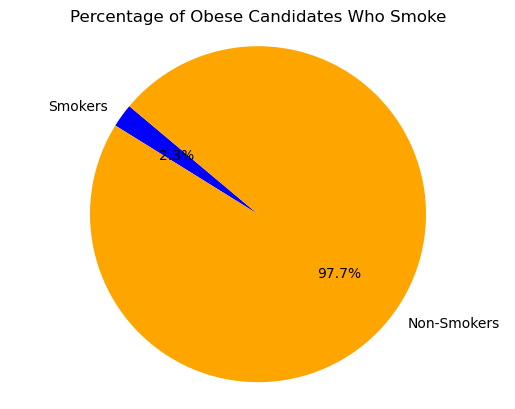

In [ ]:
#To show a correlational relationship: What percentage of obese candidates are smokers?

# Calculate the total number of obese candidates
total_candidates = obese_candidates_df.shape[0]

# Count the number of smokers and non-smokers
smokers_count = (obese_candidates_df["Hx of smoking"] == "yes").sum()
non_smokers_count = total_candidates - smokers_count

# Calculate the percentages
percentage_smokers = (smokers_count / total_candidates) * 100
percentage_non_smokers = (non_smokers_count / total_candidates) * 100

# Create label pie chart
labels = ['Smokers', 'Non-Smokers']
sizes = [percentage_smokers, percentage_non_smokers]
colors = ['blue', 'orange']

# Plot the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Obese Candidates Who Smoke')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

This pie chart depicts that the majority of obese candidates are non-smokers.

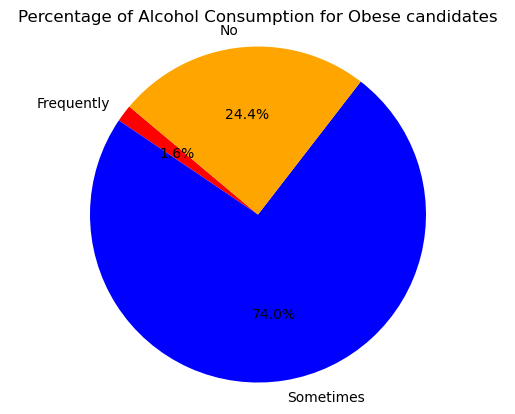

In [175]:
#To show a correlational relationship: What percentage of obese candidates consume alcohol?

#Count the occurrences of Alcohol consumption for each 'Weight classification'
alcohol_counts_df = obese_candidates_df.groupby("Weight classification")["Alcohol consumption"].value_counts().unstack(fill_value=0)

# Calculate the total number of obese candidates
total_candidates = alcohol_counts_df.sum(axis=1)

# Calculate the percentage of each alcohol consumption category for each weight class
percentage_frequently = (alcohol_counts_df["Frequently"] / total_candidates) * 100
percentage_sometimes = (alcohol_counts_df["Sometimes"] / total_candidates) * 100
percentage_no = (alcohol_counts_df["no"] / total_candidates) * 100

# Create labels and sizes for the pie chart
labels = ["Frequently", "Sometimes", "No"]
colors = ["red", "blue", "orange"]

# Plot the pie chart for each weight class
for weight_class in alcohol_counts_df.index:
    sizes = [percentage_frequently[weight_class], 
             percentage_sometimes[weight_class], percentage_no[weight_class]]
    plt.figure()
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f"Percentage of Alcohol Consumption for {weight_class} candidates")
    plt.axis("equal") 
    plt.show()


This pie chart indicates a correlation between alcohol consumption and obesity. Showing that almost 75% of the obese individual in this data set consume alcohol.

## Does physical activity have any influence on obesity risk?

In [36]:
# how many of them have low physical activity (ie time spent on tech devices- >1 , transport means- public, driving)

In [ ]:
# does physical activity have any correlation with risk of obesity?- linear reg, determine r value